# Machine Learning To Predict Users Rating

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("googleplaystore.csv", header = 0)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df.info()
# On voit que toutes les colonnes sont de types 'object' sauf Category qui est de type 'float'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Preprocessing

### Les valeurs NaN

In [5]:
df.isna().sum()
# 1474 Rating manquant

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Plutot que de supprimer les entrées avec un Rating manquant, on va les remplacer par la médiane des Rating
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [7]:
df['Rating'].median()

4.3

In [8]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
# On affiche les lignes qui possède une valeur NaN
df1 = df[df.isna().any(axis=1)]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [11]:
# Seuleument 12 lignes comporte des valeurs NaN, on peut choisir de les supprimer
df = df.dropna()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
# On check le nombre de Category différente
# df['Category'].unique()
df['Category'].nunique()

33

In [14]:
# On va remplacer les Category avec des int
df['Category'] = le.fit_transform(df['Category'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,0,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,0,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,11,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,20,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,3,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
df['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

In [16]:
# Meme traitement sur ces colonnes 
print(df['App'].nunique())
print(df['Content Rating'].nunique())
print(df['Genres'].nunique())

9648
6
119


In [17]:
df['App'] = le.fit_transform(df['App'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Genres'] = le.fit_transform(df['Genres'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6955,0,4.1,159,19M,"10,000+",Free,0,1,9,"January 7, 2018",1.0.0,4.0.3 and up
1,2630,0,3.9,967,14M,"500,000+",Free,0,1,12,"January 15, 2018",2.0.0,4.0.3 and up
2,8648,0,4.7,87510,8.7M,"5,000,000+",Free,0,1,9,"August 1, 2018",1.2.4,4.0.3 and up
3,7819,0,4.5,215644,25M,"50,000,000+",Free,0,4,9,"June 8, 2018",Varies with device,4.2 and up
4,7014,0,4.3,967,2.8M,"100,000+",Free,0,1,11,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8165,11,4.5,38,53M,"5,000+",Free,0,1,39,"July 25, 2017",1.48,4.1 and up
10837,4605,11,5.0,4,3.6M,100+,Free,0,1,39,"July 6, 2018",1.0,4.1 and up
10838,6884,20,4.3,3,9.5M,"1,000+",Free,0,1,71,"January 20, 2017",1.0,2.2 and up
10839,8386,3,4.5,114,Varies with device,"1,000+",Free,0,3,19,"January 19, 2015",Varies with device,Varies with device


### Transform data

In [18]:
# Retire les '+' et les ',' de la colonne Installs, ensuite les '$' de Price
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [19]:
df['Type'] = pd.get_dummies(df['Type'])

In [20]:
# Transforme les dates en timestamp unix
import time
import datetime
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [21]:
df['Size'].nunique()

457

In [22]:
# On retire les 'k' de la colonne Size et on divise la valeur 
df["Size"] = [str(round(float(i.replace("k", ""))/1024, 3)) if "k" in i else i for i in df.Size]
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '0.196', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '0.022', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M',
       '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M',
       '6.6M', '5.1M', '61M', '66M', '0.077', '8.4M', '0.115', '44M',
       '0.679',

In [23]:
# On retire les 'M'
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))

In [24]:
# Remplace les 'Varies with device' avec NaN, puis les remplace par la mediane 
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [25]:
# Retire les caractères non numériques
import re

replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

# Remplace les 'Varies with device' avec NaN, puis les remplace par la premiere valeur de Current Ver du df en fonction des Category 
df['Current Ver'] = df['Current Ver'].replace('Varies with device', np.nan)
df['Current Ver'] = df.groupby('Category')['Current Ver'].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Transforme les valeurs comme 1.02.25 en nombre décimaux normaux
df['Current Ver'] = df['Current Ver'].apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1))

In [26]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  int32  
 1   Category        10829 non-null  int32  
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  uint8  
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  int32  
 9   Genres          10829 non-null  int32  
 10  Last Updated    10829 non-null  float64
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int32(4), object(5), uint8(1)
memory usage: 1.2+ MB


## Data Split

In [28]:
X = df[['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']]
y = df['Rating']

In [29]:
y.value_counts(normalize=True)

4.3    0.205929
0.0    0.156432
4.4    0.077015
4.5    0.075815
4.2    0.068243
4.6    0.059655
4.1    0.054760
4.0    0.044325
4.7    0.038877
3.9    0.030751
3.8    0.025118
5.0    0.024841
4.8    0.019946
3.7    0.018284
3.6    0.014590
3.5    0.014129
3.4    0.010620
3.3    0.009050
4.9    0.007942
3.0    0.006834
3.1    0.005725
3.2    0.005448
2.9    0.003971
2.8    0.003878
2.6    0.002216
2.7    0.002124
2.3    0.001847
2.5    0.001755
2.4    0.001755
1.0    0.001478
2.2    0.001293
1.9    0.001108
2.0    0.001016
2.1    0.000739
1.7    0.000739
1.8    0.000739
1.6    0.000369
1.5    0.000277
1.4    0.000277
1.2    0.000092
Name: Rating, dtype: float64

In [30]:
# On split le dataset en 75% train_data et 25% test_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

### K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# On initialise notre model
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [32]:
# Ce modèle possède une fiabilité à 91%
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 91.39%'

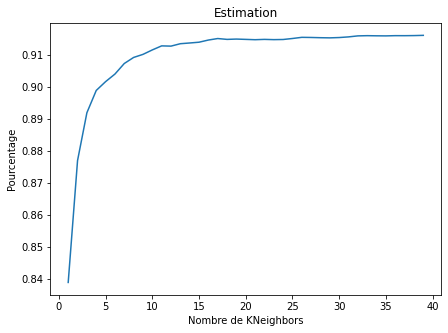

In [33]:
import matplotlib.pyplot as plt # Librairie graphique

# On va tester le pourcentage obtenu pour chaque voisin, de 1 à 40
n_neighbors = np.arange(1, 40, 1)
pourcentage = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    pourcentage.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Estimation")
plt.xlabel("Nombre de KNeighbors")
plt.ylabel("Pourcentage")
plt.plot(n_neighbors, pourcentage)

In [34]:
print("La plus haute probabilité: ", max(pourcentage))
print("Le voisin le plus proche pour atteindre ce pourcentage: ", n_neighbors[pourcentage.index(max(pourcentage))])

La plus haute probabilité:  0.9160534506286229
Le voisin le plus proche pour atteindre ce pourcentage:  39


### Random Forest

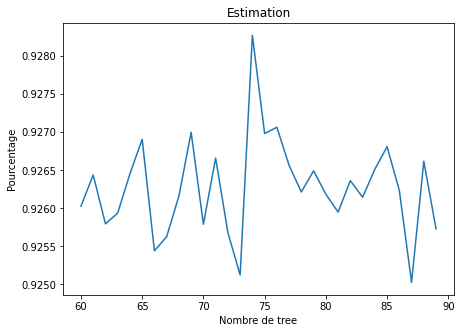

In [35]:
from sklearn.ensemble import RandomForestRegressor

# On va tester le pourcentage obtenu pour chaque tree, de 60 à 90
rf = RandomForestRegressor(n_jobs=-1)
tree = np.arange(60, 90, 1)
pourcentage = []
for n in tree:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    pourcentage.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Estimation")
plt.xlabel("Nombre de tree")
plt.ylabel("Pourcentage")
plt.plot(tree, pourcentage)

In [36]:
# Ce modèle possède une fiabilité à 92%
accuracy = rf.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.57%'

In [37]:
print("La plus haute probabilité: ", max(pourcentage))
print("Le voisin le plus proche pour atteindre ce pourcentage: ", (n_neighbors[pourcentage.index(max(pourcentage))]+60))

La plus haute probabilité:  0.9282736230150822
Le voisin le plus proche pour atteindre ce pourcentage:  75
